In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('/content/sorted_data.csv')

# List of columns to keep
columns_to_keep = ['topic', 'accuracy', 'final_score','total_questions', 'rank_numeric', 'better_than', 'mistakes_corrected', 'initial_mistake_count','percentage',
    'total_students', 'rank_fraction', 'mistake_ratio', 'name']

# Drop all other columns
df1 = df[columns_to_keep]

# Display the resulting dataframe
print(df1.head())

                         topic  accuracy  final_score  total_questions  \
0  Body Fluids And Circulation      50.0         27.0               23   
1  Body Fluids And Circulation      31.0         16.0              100   
2  Body Fluids And Circulation      90.0         35.0               23   
3  Body Fluids And Circulation      96.0        115.0              100   
4  Body Fluids And Circulation     100.0         92.0               23   

   rank_numeric  better_than  mistakes_corrected  initial_mistake_count  \
0          1598          152                   0                      9   
1          2023           35                   0                     20   
2          1598          152                   1                      2   
3           418          115                  11                     12   
4          9140          395                   3                      3   

   percentage  total_students  rank_fraction  mistake_ratio  name  
0   29.347826            1750       

Plotting different performance parameters wrt topic of current quiz.


Performance Gap=New Metric Value−Mean of Existing Metric Values

Performance Gap:
accuracy: 14.43
percentage: 67.59
mistake_ratio: 53.48
rank_fraction: 42.19


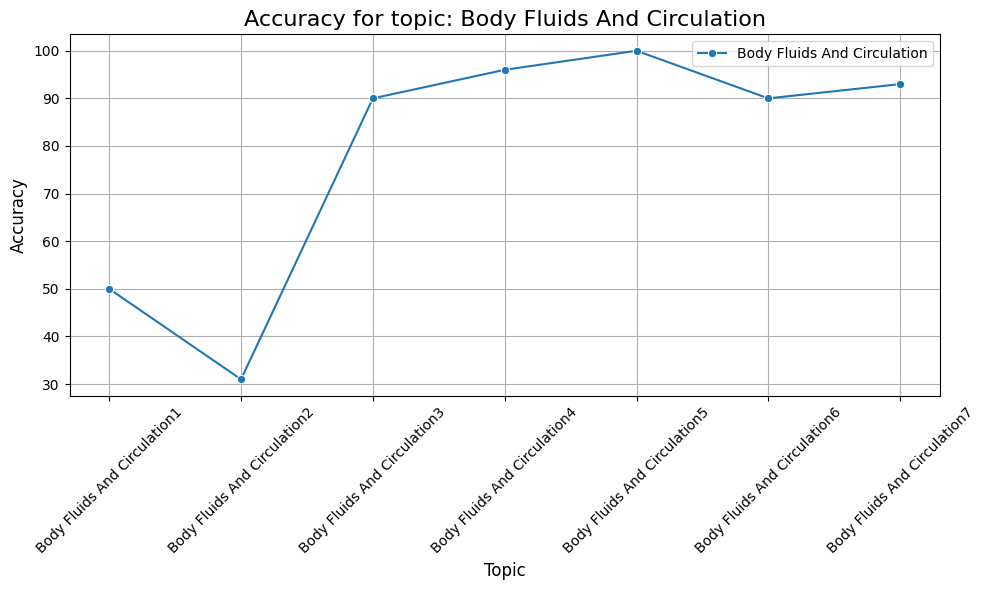

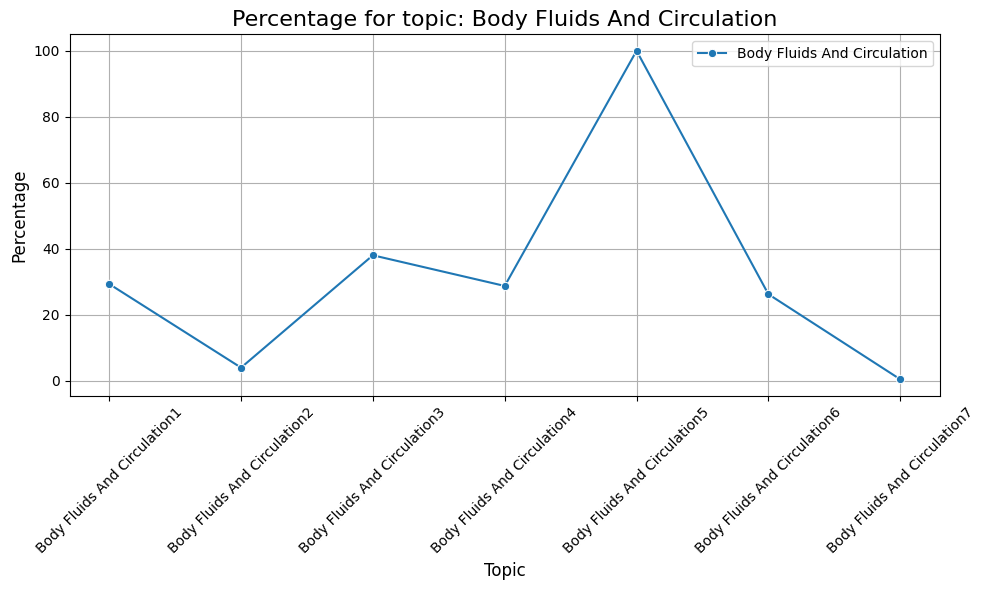

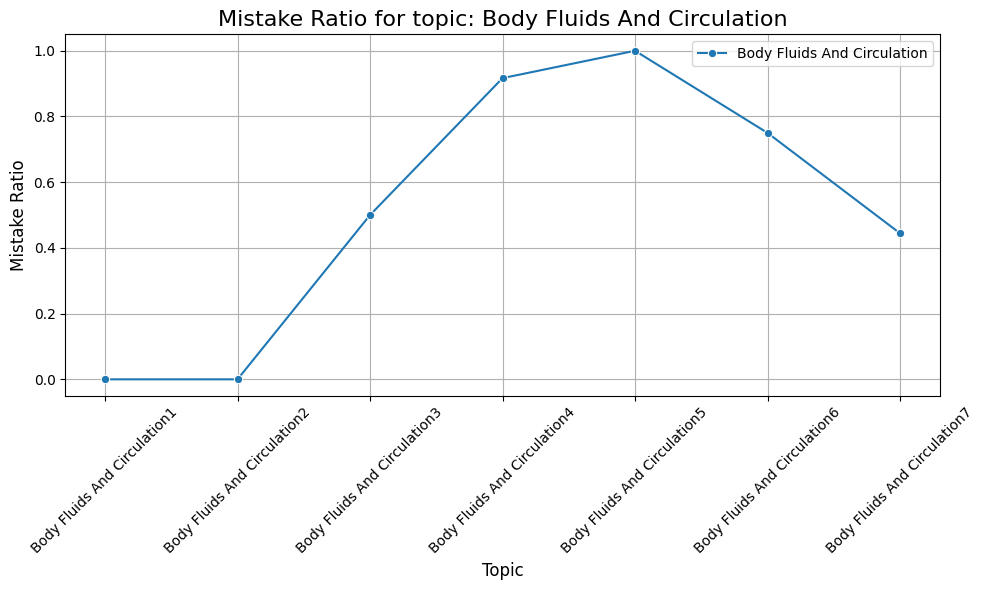

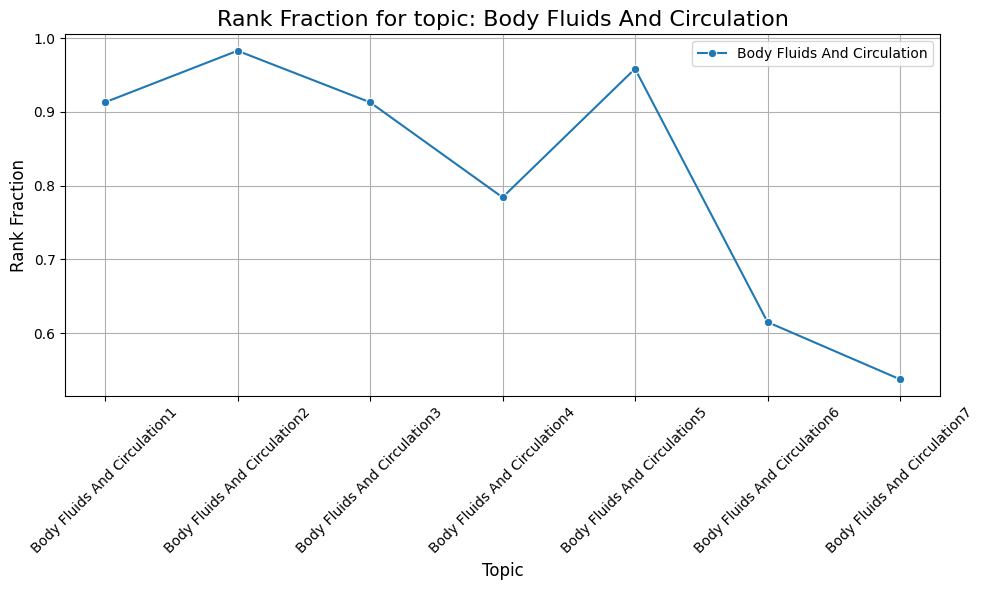

Weak Area Analysis:
- Accuracy: Strong
- Percentage: Weak
- Mistake_ratio: Weak
- Rank_fraction: Strong
The topic 'Body Fluids And Circulation' is identified as a WEAK area.


In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

input_data = ('Body Fluids And Circulation', 93, 100, 54, 43, 37, 4, 9)

# Extract variables from the input
topic = input_data[0]
accuracy = input_data[1]
percentage = input_data[2] / (input_data[3] * 4)  # Assuming the formula
total_students = input_data[4] + input_data[5]
rank_fraction = input_data[4] / total_students if total_students != 0 else 0
mistake_ratio = input_data[6] / input_data[7] if input_data[7] != 0 else 0

# Filter the dataset for the given topic
filtered_data = df1[df1['topic'] == topic]
# Get the last input number for the topic
if not filtered_data.empty:
    last_input_num = filtered_data.iloc[-1]['name'].astype(int)
else:
    last_input_num = 0  # Default to 0 if no data exists
# Update the input tuple with the derived parameters
updated_input = input_data + (percentage, total_students, rank_fraction, mistake_ratio, last_input_num + 1)
# Convert the updated input into a DataFrame
current_input_df = pd.DataFrame([updated_input], columns=[
    'topic', 'accuracy','final_score','total_questions', 'rank_numeric', 'better_than',
    'mistakes_corrected', 'initial_mistake_count','percentage',
    'total_students', 'rank_fraction', 'mistake_ratio', 'name'
])

# Add the updated input to both `df` and `filtered_data`
df1 = pd.concat([df1, current_input_df], ignore_index=True)
filtered_data = pd.concat([filtered_data, current_input_df], ignore_index=True)


# Add `topic_name` by concatenating `topic` and `name`
filtered_data['topic_name'] = filtered_data['topic'] + filtered_data['name'].astype(str)

# Metrics and their corresponding titles
metrics = ['accuracy', 'percentage', 'mistake_ratio', 'rank_fraction']
titles = ['Accuracy', 'Percentage', 'Mistake Ratio', 'Rank Fraction']

# Calculate performance gap
performance_gap = {}
if not filtered_data.empty:
    # Calculating the difference between the latest input and the mean of the existing data
    for metric in metrics:
        metric_mean = filtered_data[metric].mean()
        performance_gap[metric] = updated_input[metrics.index(metric) + 1] - metric_mean

# Print performance gap
print("Performance Gap:")
for metric, gap in performance_gap.items():
    print(f"{metric}: {gap:.2f}")

# Plotting
for metric, title in zip(metrics, titles):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=filtered_data, x='topic_name', y=metric, marker='o', label=topic)
    plt.title(f'{title} for topic: {topic}', fontsize=16)
    plt.xlabel('Topic', fontsize=12)
    plt.ylabel(title, fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()

#Finding
weak_thresholds = {
    'accuracy': 70,       # Minimum acceptable accuracy percentage
    'percentage': 50,     # Minimum acceptable percentage score
    'mistake_ratio': 0.3, # Maximum acceptable mistake ratio
    'rank_fraction': 0.3      # Minimum acceptable rank ratio
}

# Check if the quiz topic is a weak area
is_weak_area = {
    'accuracy': accuracy < weak_thresholds['accuracy'],
    'percentage': percentage * 100 < weak_thresholds['percentage'],  # Scale to percentage
    'mistake_ratio': mistake_ratio > weak_thresholds['mistake_ratio'],
    'rank_fraction': rank_fraction < weak_thresholds['rank_fraction']
}

# Combine the results to decide overall if the topic is weak
overall_weak_area = any(is_weak_area.values())

# Print the analysis
print("Weak Area Analysis:")
for metric, is_weak in is_weak_area.items():
    status = "Weak" if is_weak else "Strong"
    print(f"- {metric.capitalize()}: {status}")

# Print overall status
if overall_weak_area:
    print(f"The topic '{topic}' is identified as a WEAK area.")
else:
    print(f"The topic '{topic}' is a STRONG area.")